In [3]:
import pandas as pd
import re
import string
import nltk

pd.set_option('display.max_colwidth', 100)

data = pd.read_csv('../Data/SMSSpamCollection.txt', sep='\t', header=None)
data.columns = ['label', 'Content']

en_stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data.head()


,label,Content
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [4]:
data['Content_len'] = data['Content'].apply(lambda x: len(x) - x.count(" "))
data.head()

,label,Content,Content_len
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",92
1,ham,Ok lar... Joking wif u oni...,24
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128
3,ham,U dun say so early hor... U c already then say...,39
4,ham,"Nah I don't think he goes to usf, he lives around here though",49


In [5]:
def count_punctuation(text):
    binary_array = [1 for ch in text if ch in string.punctuation]
    nb_punctuation = sum(binary_array)
    total = len(text) - text.count(" ")
    return round(nb_punctuation / (total), 4)*100

In [6]:
data['punctuation_rate'] = data['Content'].apply(lambda x: count_punctuation(x))
data.head()

,label,Content,Content_len,punctuation_rate
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",92,9.78
1,ham,Ok lar... Joking wif u oni...,24,25.00
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.69
3,ham,U dun say so early hor... U c already then say...,39,15.38
4,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.08


In [7]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

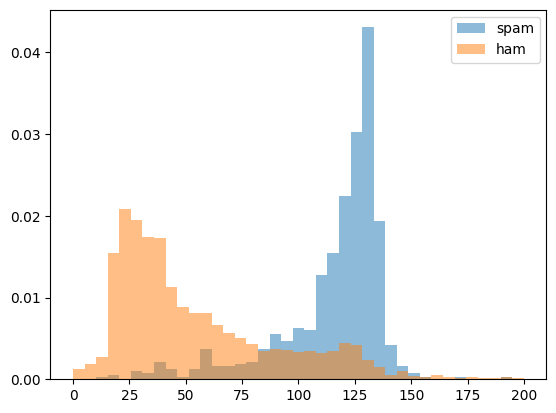

In [8]:
bins = np.linspace(0, 200, 40)

plt.hist(data[data['label']=='spam']['Content_len'], bins, alpha=0.5, density=True, label='spam')
plt.hist(data[data['label']=='ham']['Content_len'], bins, alpha=0.5, density=True, label='ham')
plt.legend(loc='upper right')
plt.show()

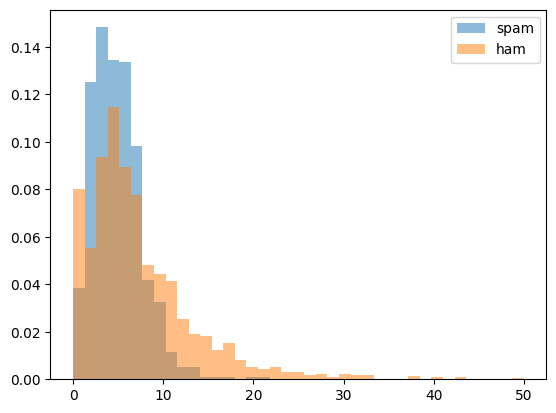

In [9]:
bins = np.linspace(0, 50, 40)

plt.hist(data[data['label']=='spam']['punctuation_rate'], bins, alpha=0.5, density=True, label='spam')
plt.hist(data[data['label']=='ham']['punctuation_rate'], bins, alpha=0.5, density=True, label='ham')
plt.legend(loc='upper right')
plt.show()